<a href="https://colab.research.google.com/github/Owen150/Compiler-Construction-Labs/blob/main/GroupCLabActivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**122287 - Michael Owen Oduor - ICS 4C**

---


**Flex Description**

> FLEX (fast lexical analyzer generator) is a tool/computer program for generating lexical analyzers (scanners or lexers).


> It is used together with Berkeley Yacc parser generator or GNU Bison parser generator.

> Flex and Bison both are more flexible than Lex and Yacc and produces faster code.

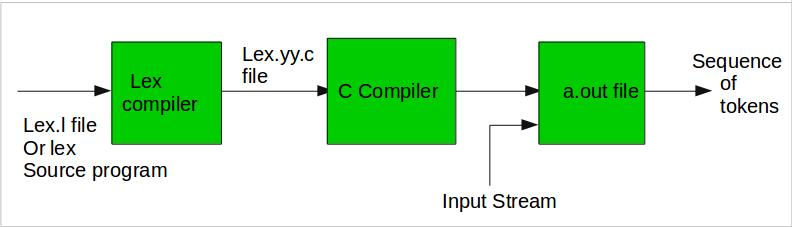




In [ ]:
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/

%{
int count = 0;
%}

/*** Rule Section has three rules, first rule
matches with capital letters, second rule
matches with any character except newline and
third rule does not take input after the enter***/

%%
[A-Z] {printf("%s capital letter\n", yytext);
	count++;}
.	 {printf("%s not a capital letter\n", yytext);}
\n {return 0;}
%%

/*** The Code Section below prints the number of
capital letters present in the given input***/

int yywrap(){}
int main(){

// Explanation
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
		which contains the input*/
/* yylex() - this is the main flex function
		which runs the Rule Section*/
// yytext is the text in the buffer

// To take input from file
FILE *fp;
char filename[50];
printf("Enter the filename: \n");
scanf("%s",filename);
fp = fopen(filename,"r");
yyin = fp;

yylex();
printf("\nNumber of Capital letters "
	"in the given input - %d\n", count);

return 0;
}

##Yacc - Yet Another Compiler-Compiler
> Yacc is a computer program for the Unix Operating systems developed by Stephen C, Johnson. It is a Look Ahead Left-to-Right Rightmost Derivation (LALR) parser-generator. LALR parser-generators are desirable because they are very fast and small in comparison to other types of parsers. The program structure of Yacc is similar to Flex in that is is divided into three sections, those being the definitions, rules and user code.
> Yacc generates C code for a syntax analyzer, or parser. It uses grammar rules that allow it to analyze tokens from lex and create a syntax tree. A syntax tree imposes a hierarchical structure on tokens. 
> Code generation, does a depth-first walk of the
syntax tree to generate code.




YACC Diagram (Source: (Nachiappan, n.d.))

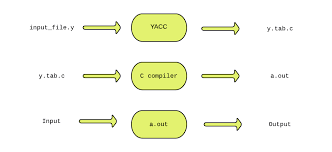

In [ ]:
%{
   include <ctype.h>
   include <stdio.h>
   define YYSTYPE double /* double type for yacc stack */
%}
 
%%
 Lines :  Lines S '\n' { printf("OK \n"); }
       |  S '\n’
       |  error '\n' {yyerror("Error: reenter last line:");
                        yyerrok; };
 S     :  '(' S ')’
       |  '[' S ']’
       |   /* empty */    ;
%%
 
include "lex.yy.c"
  
void yyerror(char * s)
/* yacc error handler */
{  
 fprintf (stderr, "%s\n", s);
}
  
int main(void)
 {
 return yyparse();
 } 

### **Bison**
Bison is a parser generator.

It is to parsers what flex is to scanners. You provide the input of a grammar specification and it generates an LALR(1) parser to recognize sentences in that grammar. 

Bison is an upgraded version of the older tool yacc, "yet another compiler compiler" and it is probably the most common of the LALR tools out there. 

Bison is designed for use with C code and generates a parser written in C.

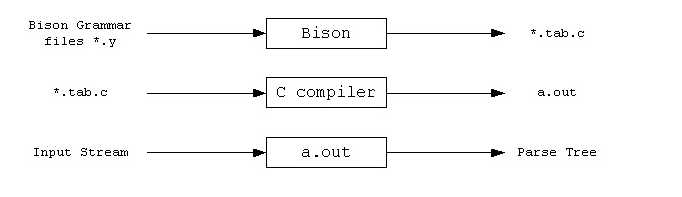

In [ ]:
%code
{
  namespace yy
  {
    // Return the next token.
    auto yylex () -> parser::symbol_type
    {
      static int count = 0;
      switch (int stage = count++)
        {
        case 0:
          return parser::make_TEXT ("I have three numbers for you.");
        case 1: case 2: case 3:
          return parser::make_NUMBER (stage);
        case 4:
          return parser::make_TEXT ("And that's all!");
        default:
          return parser::make_YYEOF ();
        }
    }
  }
}


%%
namespace yy
{
  // Report an error to the user.
  auto parser::error (const std::string& msg) -> void
  {
    std::cerr << msg << '\n';
  }
}

int main ()
{
  yy::parser parse;
  return parse ();
}

#Lex - Lexical Analyser Generator
> Lex is a program that generates lexical analyzer that reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program (LEX - Javatpoint, n.d.). 
> Lex generates C code for a lexical analyzer, or scanner. It uses patterns that match strings in the input and converts the strings to tokens. Tokens are numerical representations of strings, and simplify processing.
> It is used with YACC parser generator. Lex File format follows the same format as Flex and Yacc, in that it is divided into three sections of definitions, rules and user code functions.



A diagram representing Lex (Source: ):

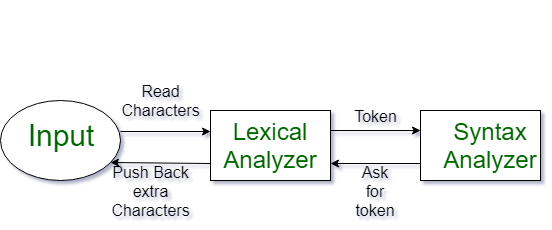

In [ ]:
#include <stdio.h>

%%
   
[0-9]+  {
            printf("This is an integer: %s\n", yytext);
        }

.|\n  {  }

%%

int main(void)
{
    yylex();
    return 0;
}

References

https://arcb.csc.ncsu.edu/~mueller/codeopt/codeopt00/y_man.pdf
http://www.cs.bilkent.edu.tr/~guvenir/courses/CS315/lex-yacc/lex-yacc.pdf
https://www.geeksforgeeks.org/yacc-program-to-implement-a-calculator-and-recognize-a-valid-arithmetic-expression/

Bison—Examples. (n.d.). Retrieved September 8, 2022, from http://web.mit.edu/gnu/doc/html/bison_5.html
Gao. (n.d.). Bison Tutorial. Retrieved September 8, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html
Johnson, M. (2012, July 9). Introduction to Bison. https://web.stanford.edu/class/archive/cs/cs143/cs143.1128/handouts/120%20Introducing%20bison.pdf

https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

https://www.slideshare.net/SandipBasnet3/flex-fast-lexical-analyzer-generator

Levine, J. R., & Levine, J. R. (2009). Flex & bison (1st ed). O’Reilly.

Levine, J. R., Mason, T., & Brown, D. (1997). Lex & yacc (2. ed., minor corr). O’Reilly.
